# Практика№2 БВТ2102 Обыденков Константин

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mclr
from tensorflow.keras import layers
from tensorflow.keras import models

2024-10-21 22:22:52.126746: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
def genData(size=500):
    data = np.random.rand(size, 2)*2 - 1
    label = np.zeros([size, 1])
    for i, p in enumerate(data):
        if (p[0] + .5 >= p[1]) and (p[0] - 0.5 <= p[1]):
            label[i] = 1.
        else:
            label[i] = 0.
    div = round(size*0.8)
    train_data = data[:div, :]
    test_data = data[div:, :]
    train_label = label[:div, :]
    test_label = label[div:, :]
    return (train_data, train_label), (test_data, test_label)


def drawResults(data, label, prediction):
    p_label = np.array([round(x[0]) for x in prediction])
    plt.scatter(data[:, 0], data[:, 1], s=30, c=label[:, 0], cmap=mclr.ListedColormap(['red', 'blue']))
    plt.scatter(data[:, 0], data[:, 1], s=10, c=p_label, cmap=mclr.ListedColormap(['red', 'blue']))
    plt.grid()
    plt.show()
(train_data, train_label), (test_data, test_label) = genData()


In [54]:

#В данном месте необходимо создать модель и обучить ее
model = models.Sequential([
  layers.Dense(32, activation='relu', input_shape=(2,)),
  layers.Dense(8, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
H = model.fit(train_data, train_label, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 20ms/step - loss: 0.7059 - accuracy: 0.4469 - val_loss: 0.7135 - val_accuracy: 0.3375
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6959 - accuracy: 0.4281 - val_loss: 0.7024 - val_accuracy: 0.3625
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6895 - accuracy: 0.4406 - val_loss: 0.6942 - val_accuracy: 0.4250
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6841 - accuracy: 0.5000 - val_loss: 0.6875 - val_accuracy: 0.5500
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6797 - accuracy: 0.5875 - val_loss: 0.6813 - val_accuracy: 0.6750
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6756 - accuracy: 0.6656 - val_loss: 0.6759 - val_accuracy: 0.7000
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6719 - accuracy: 0.6844 - val_loss: 0.6709 - val_accuracy: 0.7750
Epoch 8/100


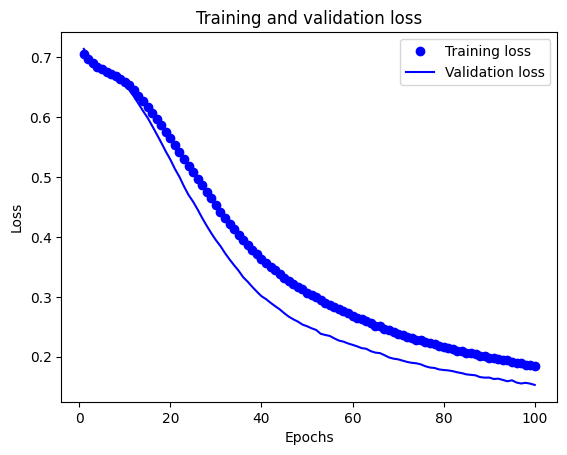

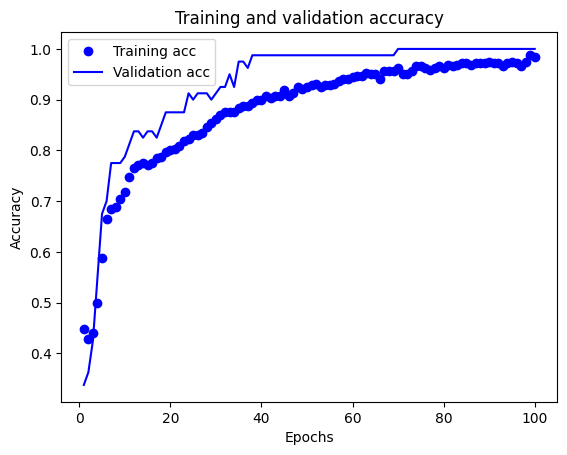

4/4 [==============================] - 0s 1ms/step - loss: 0.1668 - accuracy: 0.9800
[0.1668231040239334, 0.9800000190734863]
16/16 [==============================] - 0s 714us/step


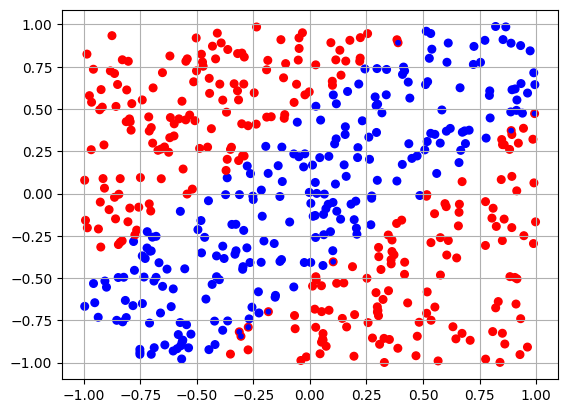

In [55]:
#Получение ошибки и точности в процессе обучения
loss = H.history['loss']
val_loss = H.history['val_loss']
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']
epochs = range(1, len(loss) + 1)
#Построение графика ошибки
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#Построение графика точности
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#Получение и вывод результатов на тестовом наборе
results = model.evaluate(test_data, test_label)
print(results)
#Вывод результатов бинарной классификации
all_data = np.vstack((train_data, test_data))
all_label = np.vstack((train_label, test_label))
pred = model.predict(all_data)
drawResults(all_data, all_label, pred)
